## Loading Libraries & Data

In [2]:
import seaborn as sns
import matplotlib as mtpl 
import plotly as plt
import numpy as np
import pandas as pd
import sys
import getopt
import plotly.express as px
import openpyxl
import copy
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
print(pd.__version__)
print(np.__version__)


1.0.3
1.18.4


In [3]:
farmed = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-10-12/aquaculture-farmed-fish-production.csv")
captured_vs_farmed = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-10-12/capture-fisheries-vs-aquaculture.csv")
captured = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-10-12/capture-fishery-production.csv")
consumption = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-10-12/fish-and-seafood-consumption-per-capita.csv")
stock = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-10-12/fish-stocks-within-sustainable-levels.csv")
fishery = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-10-12/global-fishery-catch-by-sector.csv")
production = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-10-12/seafood-and-fish-production-thousand-tonnes.csv")

## Cross checking the "captured" and the "farmed" tables with the "captured_vs_farmed" table

In [4]:
captured_vs_farmed.columns = captured_vs_farmed.columns.str.replace(' ', '_')
captured_vs_farmed['Capture_fisheries_production_(metric_tons)'] = captured_vs_farmed['Capture_fisheries_production_(metric_tons)'].replace(np.nan,0)
captured_vs_farmed['Aquaculture_production_(metric_tons)'] = captured_vs_farmed['Aquaculture_production_(metric_tons)'].replace(np.nan,0)

#Checking if all "captured" data is found in the captured_vs_farmed table
sum(captured["Capture fisheries production (metric tons)"]) - sum(captured_vs_farmed['Capture_fisheries_production_(metric_tons)'])

#Checking if all "farmed" data is found in the captured_vs_farmed table
sum(farmed["Aquaculture production (metric tons)"]) - sum(captured_vs_farmed['Aquaculture_production_(metric_tons)'])

0.0

0.0

## Removing the regions that are groups from the captured_vs_farmed and from consumption

In [5]:
ToExclude = (["Africa", "Americas", "Africa Eastern and Southern", "Africa Western and Central", "Arab World", "Asia", "Asia, Central", "Australia & New Zealand", "Caribbean", "Central America", "Central Europe and the Baltics", "Channel Islands", "Eastern Africa", "Eastern Asia", "Eastern Europe", "Ethiopia PDR", "Europe", "Europe, Western", "European Union", "Early-demographic dividend", "East Asia & Pacific", "East Asia & Pacific (IDA & IBRD)", "East Asia & Pacific (excluding high income)", "Equatorial Guinea", "Euro area", "Europe & Central Asia", "Europe & Central Asia (IDA & IBRD)", "Europe & Central Asia (excluding high income)", "Fragile and conflict affected situations", "Heavily indebted poor countries (HIPC)", "High income", "IBRD only", "IDA & IBRD total", "IDA blend", "IDA only", "IDA total", "Land Locked Developing Countries", "Least Developed Countries", "Low Income Food Deficit Countries", "Late-demographic dividend", "Latin America & Caribbean", "Latin America & Caribbean (IDA & IBRD)", "Latin America & Caribbean (excluding high income)", "Least developed countries: UN classification", "Low & middle income", "Low income", "Lower middle income", "Middle East & North Africa", "Middle East & North Africa (IDA & IBRD)", "Middle East & North Africa (excluding high income)", "Middle income", "Middle Africa", "Net Food Importing Developing Countries", "Netherlands Antilles", "Northern Africa", "Northern America", "Northern Europe", "North America", "OECD members", "Other small states", "Pacific island small states", "Post-demographic dividend", "Pre-demographic dividend", "Oceania", "Serbia and Montenegro", "Small island developing States", "South AmericaSouth America","South America" , "South Eastern Asia", "Southern Africa", "Southern Asia", "Southern Europe", "Sudan (former)", "Small states", "South Asia", "South Asia (IDA & IBRD)", "South Sudan", "Sub-Saharan Africa", "Sub-Saharan Africa (IDA & IBRD)", "Sub-Saharan Africa (excluding high income)", "Upper middle income", "USSR", "Western Africa", "Western Asia", "World"])

captured_vs_farmed['Entity'] = captured_vs_farmed[~captured_vs_farmed['Entity'].isin(ToExclude)]
captured_vs_farmed = captured_vs_farmed.dropna()

consumption['Entity'] = consumption[~consumption['Entity'].isin(ToExclude)]
consumption = consumption.dropna()


## Visualizing the Timeline graph of the captured_vs_farmed

(array([1950., 1960., 1970., 1980., 1990., 2000., 2010., 2020., 2030.]),
 <a list of 9 Text major ticklabel objects>)

Text(0.5, 1.0, 'Aquaculture vs Capture Trend Timeline')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Metric Tones')

([<matplotlib.axis.XTick at 0x11db52110>,
 [Text(0, 0, '1960'),
  Text(0, 0, '1965'),
  Text(0, 0, '1970'),
  Text(0, 0, '1975'),
  Text(0, 0, '1980'),
  Text(0, 0, '1985'),
  Text(0, 0, '1990'),
  Text(0, 0, '1995'),
  Text(0, 0, '2000'),
  Text(0, 0, '2005'),
  Text(0, 0, '2010'),
  Text(0, 0, '2015'),
  Text(0, 0, '2020')])

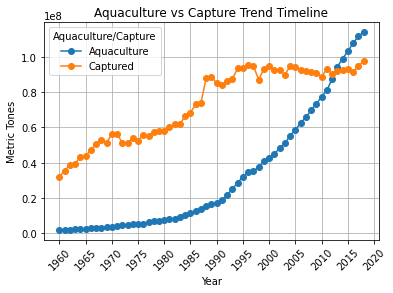

In [6]:
cap_vs_farm_time = captured_vs_farmed[['Year', 'Aquaculture_production_(metric_tons)', 'Capture_fisheries_production_(metric_tons)']]

cap_vs_farm_time_pivoted = cap_vs_farm_time.melt(id_vars = "Year", var_name = "Aquaculture/Capture", value_name = "Metric Tones")
cap_vs_farm_time_pivoted['Aquaculture/Capture'] = cap_vs_farm_time_pivoted['Aquaculture/Capture'].replace("Capture_fisheries_production_(metric_tons)", "Captured")
cap_vs_farm_time_pivoted['Aquaculture/Capture'] = cap_vs_farm_time_pivoted['Aquaculture/Capture'].replace("Aquaculture_production_(metric_tons)", "Aquaculture")



df = cap_vs_farm_time_pivoted.groupby(['Year', 'Aquaculture/Capture']).sum()['Metric Tones']
df.unstack().plot(marker="o")
mtpl.pyplot.xticks(rotation=45)
mtpl.pyplot.title('Aquaculture vs Capture Trend Timeline')
mtpl.pyplot.xlabel('Year') 
mtpl.pyplot.ylabel('Metric Tones')
mtpl.pyplot.grid(True)
x = [1960, 1965, 1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020]
mtpl.pyplot.xticks(x,x)


As we see here Aquaculture has evolved throughout the years. It's starting to incline more steeply around the 1990s and around 2010-2011 and on the contrary the Capture amount has been decreasing after that year. This means that people are realizing the increase of the demand on the fish food and they also, with technology and education, are realizing that aquaculture may be a good way to save the aqua natural life and avoid endangering species.

## Consumption of seafood related data (LineChart)

(array([1950., 1960., 1970., 1980., 1990., 2000., 2010., 2020.]),
 <a list of 8 Text major ticklabel objects>)

Text(0.5, 1.0, 'Consumption Timeline')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'kg/capita/year')

([<matplotlib.axis.XTick at 0x120110f90>,
 [Text(0, 0, '1960'),
  Text(0, 0, '1965'),
  Text(0, 0, '1970'),
  Text(0, 0, '1975'),
  Text(0, 0, '1980'),
  Text(0, 0, '1985'),
  Text(0, 0, '1990'),
  Text(0, 0, '1995'),
  Text(0, 0, '2000'),
  Text(0, 0, '2005'),
  Text(0, 0, '2010'),
  Text(0, 0, '2015'),
  Text(0, 0, '2020')])

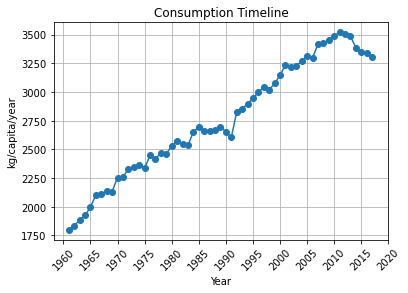

In [7]:
consumption_time = consumption[['Year', 'Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)']]

df2 = consumption_time.groupby(['Year']).sum()['Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)'] 
df2.plot(marker="o")
mtpl.pyplot.xticks(rotation=45)
mtpl.pyplot.title('Consumption Timeline')
mtpl.pyplot.xlabel('Year') 
mtpl.pyplot.ylabel('kg/capita/year')
mtpl.pyplot.grid(True)
x = [1960, 1965, 1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020]
mtpl.pyplot.xticks(x,x)



The consumption of seafood is increasing over time and of course this relates to the worldwide population increase and also the number of people who are choosing to make their main source of protein the seafood, mainly fish.

In 2014 though we can see a very sharp decrease in the consumption from 4000-4100 to 3300-3400 kg/capita/yr and it continues to be on the decline after that as well.


## Consumption of seafood related data (Full TreeMap)

In [8]:
colors=['#fae588','#f79d65','#f9dc5c','#e8ac65','#e76f51','#ef233c','#b7094c']
consumption_Entity = consumption[['Entity','Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)']]
fig = px.treemap(data_frame=consumption_Entity,path=['Entity'],values='Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)',width=800, height=400,hover_data=None, hover_name=None)
fig.data[0].textinfo = 'label+text+value'
fig.update_layout(
    treemapcolorway = colors, #defines the colors in the treemap
    margin = dict(t=5, l=5, r=5, b=5))


## Consumption of seafood related data (Top 20 Countries TreeMap)

In [9]:
colors=['#fae588','#f79d65','#f9dc5c','#e8ac65','#e76f51','#ef233c','#b7094c']
consumption_Entity_top20 = consumption[['Entity','Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)']]
consumption_Entity_top20 = consumption_Entity_top20.groupby('Entity', as_index=False).agg({'Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)':'sum'})
consumption_Entity_top20 = consumption_Entity_top20.sort_values('Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)',ascending=False).head(20)
fig2 = px.treemap(data_frame=consumption_Entity_top20,path=['Entity'],values='Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)',width=800, height=400)
fig2.data[0].textinfo = 'label+text+value'
fig2.update_layout(
    treemapcolorway = colors, #defines the colors in the treemap
    margin = dict(t=5, l=5, r=5, b=5))


The Maldives hold the most consumpton of seafood by 6,888.51 kg/capita/yr followed by Iceland and Kribati. It's interesting to see here that in the top 3 we can't find the biggest countries in the world like the United States, Russia or even China, instead we find countries that are islands with much less population with higher consumption of seafood.

## Consumption of seafood related data (BarChart)

Text(0.5, 1.0, 'Consumption of Top 20 Countries')

Text(0.5, 0, 'kg/capita/yr')

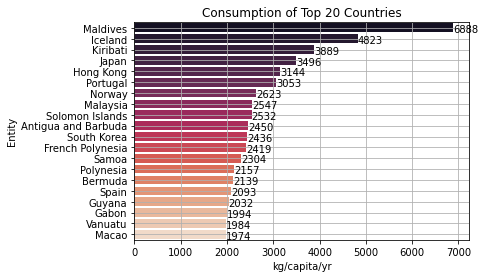

In [10]:
colors=['#fae588','#f79d65','#f9dc5c','#e8ac65','#e76f51','#ef233c','#b7094c']
consumption_Entity_top20_bar = consumption[['Entity','Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)']]
consumption_Entity_top20_bar = consumption_Entity_top20_bar.groupby('Entity', as_index=False).agg({'Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)':'sum'})
consumption_Entity_top20_bar = consumption_Entity_top20_bar.sort_values('Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)',ascending=False).head(20)

fig3 = sns.barplot(x = consumption_Entity_top20_bar['Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)'], y = consumption_Entity_top20_bar['Entity'],palette = "rocket")
mtpl.pyplot.title('Consumption of Top 20 Countries')
mtpl.pyplot.xlabel('kg/capita/yr')
mtpl.pyplot.grid(True)

#Enabling the display of values per country
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)


show_values_on_bars(fig3, "h", 0.3)

## Checking the Percentage of the top 20 countries over the total number of consumption

In [11]:
Total_consumption = sum(consumption['Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)'])
Total_top20_consumption = sum(consumption_Entity_top20['Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)'])
Percentage_Total = round((Total_top20_consumption/Total_consumption) * 100, ndigits=2) 
print("The top 20 countries consume %",Percentage_Total,"from the total consumption of seafood in the world")

The top 20 countries consume % 36.27 from the total consumption of seafood in the world


## Tracking the difference of the total production and total consumption


### TOTALS WITH NO TIMLINE

([<matplotlib.patches.Wedge at 0x120f86d10>,
 [Text(0.3988749501398499, 1.0251335396673609, 'Total_Consumption(MetricTonnes)'),
  Text(-0.39887504611977753, -1.025133502321988, 'Total_Production')],
 [Text(0.2175681546217363, 0.5591637489094695, '38.2%'),
  Text(-0.2175682069744241, -0.5591637285392661, '61.8%')])

Text(0.5, 1.0, 'Total Production vs Total Consumption')

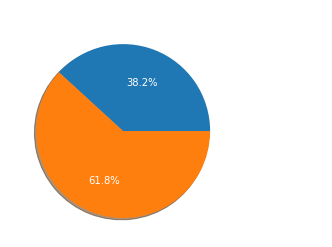

In [12]:
#Adding a total production column
captured_vs_farmed['Total_Production'] = captured_vs_farmed['Aquaculture_production_(metric_tons)'] + captured_vs_farmed['Capture_fisheries_production_(metric_tons)']

#Grouping the captured/farmed table by entity
captured_vs_farmed_group = captured_vs_farmed.groupby('Entity', as_index=False).agg({'Total_Production':'sum'})

#Grouping the consumption table by entity
consumption_group = consumption.groupby('Entity', as_index=False).agg({'Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)' : 'sum'})

##Converting the Kg to Metric Tonnes
consumption_group =  consumption_group.rename(columns={'Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)':'Total_consumption'})
consumption_group['Total_consumption'] = consumption_group['Total_consumption']/1000

##In order to be able to get and analyze the difference between the production and the consumption we need to get all the numbers in the same measuring units, so in this case we need to convert the kg/capita/yr to metric tonnes and in order to do that we will need the population number per year per country which we will get from https://data.worldbank.org/indicator/SP.POP.TOTL

#Importing the Population data
population_data = pd.read_excel("~/Desktop/Data Analysis Case Studies/Case Study 4/API_SP.POP.TOTL_DS2_en_excel_v2_3358348.xlsx", sheet_name=0, skiprows= 3)
population_data = population_data.drop(['Indicator Name', 'Indicator Code'], axis = 1)
population_data = population_data.melt(id_vars=['Country Name', 'Country Code'], var_name='Year', value_name='Population_count')
population_data = population_data.rename(columns = {'Country Name':'Entity'})

#Group the population table by Entity
population_data_Group = population_data.groupby('Entity',as_index=False).agg({'Population_count':'mean'})
population_data_Group = population_data_Group.rename(columns = {'Population_count':'Average_Population'})

#Merging the Population_data with the Consumption_group
Consumption_population_data = pd.merge(population_data_Group,consumption_group)
Consumption_population_data['Total_Consumption(MetricTonnes)'] = Consumption_population_data['Total_consumption'] * Consumption_population_data['Average_Population']
Consumption_population_data = Consumption_population_data[['Entity', 'Total_Consumption(MetricTonnes)']]

#Merging the Consumption data with the captured/Farmed data ("Production" data)
Cons_Prod_Diff = pd.merge(Consumption_population_data, captured_vs_farmed_group)
Cons_Prod_Diff = Cons_Prod_Diff.round(decimals=0)

#Creating a difference column which measures the difference between the production and the consumption per country
Cons_Prod_Diff['Difference'] = Cons_Prod_Diff['Total_Production'] - Cons_Prod_Diff['Total_Consumption(MetricTonnes)']

#Visualizing and Analyzing the Difference to see if there is a surplus or a deficit in the seafood production in the world
Cons_Prod_Diff = Cons_Prod_Diff.melt(id_vars='Entity', var_name='Measure(MetricTones)', value_name="Value")
Cons_Prod_Diff_group = Cons_Prod_Diff.groupby('Measure(MetricTones)', as_index=False).agg({'Value' : 'sum'})
Cons_Prod_Diff_group = Cons_Prod_Diff_group[Cons_Prod_Diff_group['Measure(MetricTones)'] != 'Difference'] 
mtpl.pyplot.pie(Cons_Prod_Diff_group['Value'], labels=Cons_Prod_Diff_group['Measure(MetricTones)'], shadow=True, autopct='%1.1f%%', textprops={'color':"w"})
mtpl.pyplot.title('Total Production vs Total Consumption', color = 'w')
mtpl.pyplot.show()

This shows clearly that there is a good amount of surpluss between what is produced vs what is consumed. The chart shows us that there is a surpluss of %23.6 of seafood which leads to an increase of waste or unedible expired products..etc. So this graph shows that the production of seafood in total is not being done in an efficient way.

### TIMELINE DIFFERENCE OVER THE YEARS

Text(0.5, 1.0, 'Production vs Consumption Difference')

Text(0, 0.5, 'Metric Tones (10^8)')

([<matplotlib.axis.XTick at 0x120f7c290>,
 [Text(0, 0, '1960'),
  Text(0, 0, '1965'),
  Text(0, 0, '1970'),
  Text(0, 0, '1975'),
  Text(0, 0, '1980'),
  Text(0, 0, '1985'),
  Text(0, 0, '1990'),
  Text(0, 0, '1995'),
  Text(0, 0, '2000'),
  Text(0, 0, '2005'),
  Text(0, 0, '2010'),
  Text(0, 0, '2015'),
  Text(0, 0, '2020')])

Text(0.5, 1.0, 'Population Count Timeline')

([<matplotlib.axis.XTick at 0x12102bd10>,
 [Text(0, 0, '1960'),
  Text(0, 0, '1965'),
  Text(0, 0, '1970'),
  Text(0, 0, '1975'),
  Text(0, 0, '1980'),
  Text(0, 0, '1985'),
  Text(0, 0, '1990'),
  Text(0, 0, '1995'),
  Text(0, 0, '2000'),
  Text(0, 0, '2005'),
  Text(0, 0, '2010'),
  Text(0, 0, '2015'),
  Text(0, 0, '2020')])

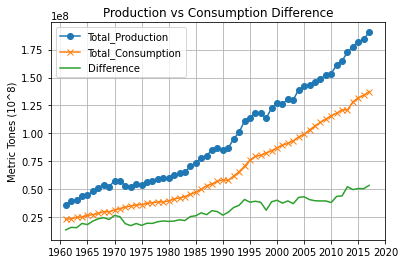

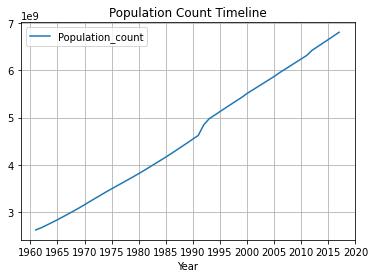

In [13]:
#Grouping the captured/farmed table by entity and year (Production)
captured_vs_farmed_TimeGroup = captured_vs_farmed.groupby(['Entity', 'Year'], as_index=False).agg({'Total_Production':'sum'})

#Grouping the consumption table by entity and year (Consumption)
consumption_TimeGroup = consumption.groupby(['Entity', 'Year'], as_index=False).agg({'Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)':'sum'})
consumption_TimeGroup = consumption_TimeGroup.rename(columns = {'Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)': 'Total_Consumption'})
consumption_TimeGroup['Total_Consumption'] = consumption_TimeGroup['Total_Consumption']/1000

#Group the population table by Country Name
population_data_TimeGroup = population_data.groupby(['Entity', 'Year'], as_index = False).agg({'Population_count':'sum'})
population_data_TimeGroup['Year'] = population_data_TimeGroup['Year'].astype(int)

#Merging the Population_data with the Consumption_group (TimeGroups)
Consumption_population_TimeData = pd.merge(consumption_TimeGroup, population_data_TimeGroup)
Consumption_population_TimeData = Consumption_population_TimeData[Consumption_population_TimeData['Total_Consumption'] != 0]
Consumption_population_TimeData['Total_consumption (Metric Tones)'] = Consumption_population_TimeData['Total_Consumption'] * Consumption_population_TimeData['Population_count']
Consumption_population_TimeData = Consumption_population_TimeData.drop(['Total_Consumption'],axis = 1)
Consumption_population_TimeData['Total_consumption (Metric Tones)'] = round(Consumption_population_TimeData['Total_consumption (Metric Tones)'], ndigits=0)

#Merging the Consumption data with the captured/Farmed data ("Production" data)
Cons_Prod_TimeGroup = pd.merge(Consumption_population_TimeData, captured_vs_farmed_TimeGroup)

#Creating a difference column which measures the difference between the production and the consumption per country
Cons_Prod_TimeGroup['Difference'] = Cons_Prod_TimeGroup['Total_Production'] - Cons_Prod_TimeGroup['Total_consumption (Metric Tones)']
Cons_Prod_TimeGroup = Cons_Prod_TimeGroup.rename(columns = {'Total_consumption (Metric Tones)':'Total_Consumption'})


#Visualizing and Analyzing the Difference to see if there is a surplus or a deficit in the seafood production in the world
df3 = Cons_Prod_TimeGroup.groupby(['Year'], as_index= False).sum()

##Plot 1
mtpl.pyplot.plot('Year', 'Total_Production', data= df3, marker="o")
mtpl.pyplot.plot('Year', 'Total_Consumption', data= df3, marker="x")
mtpl.pyplot.plot('Year', 'Difference', data= df3, marker="")
mtpl.pyplot.legend()
mtpl.pyplot.title('Production vs Consumption Difference')
mtpl.pyplot.ylabel('Metric Tones (10^8)')
mtpl.pyplot.grid(True)
x = [1960, 1965, 1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020]
mtpl.pyplot.xticks(x,x)


##Plot 2
df3.plot('Year', 'Population_count')
mtpl.pyplot.legend()
mtpl.pyplot.title('Population Count Timeline')
mtpl.pyplot.grid(True)
x = [1960, 1965, 1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020]
mtpl.pyplot.xticks(x,x)


All the numbers in the above graphs show a significant increase from the 1960s till 2017, by all we are including the difference (surplus) of the production of total seafood in the world.
It seems that as the population increases along with the consumption, naturally, of seafood related products the production is increasing with a much higher pace than the population and the consumption, that's why there is always extra production hence paving the way of unnecessary waste, which has a negative side effect to the environment and aqua life, so it is very important to emphasize here on the control of the production of seafood to decrease the surplus of a huge ~50,000,000 metric tonnes per year of seafood.


## Visualizing the Sustainable vs Overexploited fish throughout the years

Text(0.5, 1.0, 'Sustainable vs Overexploited fish')

Text(0, 0.5, 'Value(%)')

([<matplotlib.axis.XTick at 0x120f87b50>,
 [Text(0, 0, '1975'),
  Text(0, 0, '1980'),
  Text(0, 0, '1985'),
  Text(0, 0, '1990'),
  Text(0, 0, '1995'),
  Text(0, 0, '2000'),
  Text(0, 0, '2005'),
  Text(0, 0, '2010'),
  Text(0, 0, '2015'),
  Text(0, 0, '2017')])

([<matplotlib.axis.YTick at 0x120f80c50>,
 [Text(0, 0, '0'),
  Text(0, 0, '10'),
  Text(0, 0, '20'),
  Text(0, 0, '30'),
  Text(0, 0, '40'),
  Text(0, 0, '50'),
  Text(0, 0, '60'),
  Text(0, 0, '70'),
  Text(0, 0, '80'),
  Text(0, 0, '90'),
  Text(0, 0, '100')])

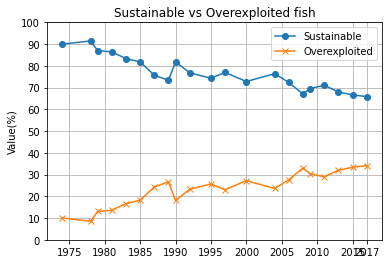

In [14]:
df4 = stock.drop(['Code'], axis = 1)
df4 = df4.rename(columns = {'Share of fish stocks within biologically sustainable levels (FAO, 2020)' : 'Sustainable',
                                                'Share of fish stocks that are overexploited' : 'Overexploited'})
#stock_pivoted = stock_pivoted.melt(id_vars= ['Year', 'Entity'], var_name = 'Description', value_name = 'Value')
df4 = df4[df4['Entity']=='World']
df4 = df4.groupby(['Year'], as_index=False).sum()

mtpl.pyplot.plot('Year', 'Sustainable', data= df4, marker="o")
mtpl.pyplot.plot('Year', 'Overexploited', data= df4, marker="x")
mtpl.pyplot.legend()
mtpl.pyplot.title('Sustainable vs Overexploited fish')
mtpl.pyplot.ylabel('Value(%)')
mtpl.pyplot.grid(True)
x = [1975,1980,1985,1990,1995,2000,2005,2010,2015,2017]
y = [0,10,20,30,40,50,60,70,80,90,100]
mtpl.pyplot.xticks(x,x)
mtpl.pyplot.yticks(y,y)

Starting from 1978 the sustainable Fish % is on almost a constant decrease starting from %91.46 till it reaches %65.85 in 2017 and in parallel the % of overexploited fish is increasing starting from 1978 with a % of 8.53 till it reaches %34.15 in 2017. So there's a change of %25.61 from 1978 till 2017, this indicates that with the increase of population the production is naturally increasing but not efficiently which is causing waste and overexploited fish, which is basically harming the aqua life and is probably causing an increase to global warming because of unncessary waste.

## Visualizing the type of fisheries throughout the years

Text(0.5, 1.0, 'Fishery Type Productions')

Text(0, 0.5, 'Metric Tone')

([<matplotlib.axis.XTick at 0x12116add0>,
 [Text(0, 0, '1950'),
  Text(0, 0, '1955'),
  Text(0, 0, '1960'),
  Text(0, 0, '1965'),
  Text(0, 0, '1970'),
  Text(0, 0, '1975'),
  Text(0, 0, '1980'),
  Text(0, 0, '1985'),
  Text(0, 0, '1990'),
  Text(0, 0, '1995'),
  Text(0, 0, '2000'),
  Text(0, 0, '2005'),
  Text(0, 0, '2010')])

([<matplotlib.axis.YTick at 0x12117d810>,
 [Text(0, 0, '5000000'),
  Text(0, 0, '10000000'),
  Text(0, 0, '15000000'),
  Text(0, 0, '20000000'),
  Text(0, 0, '25000000'),
  Text(0, 0, '30000000'),
  Text(0, 0, '40000000'),
  Text(0, 0, '45000000'),
  Text(0, 0, '50000000'),
  Text(0, 0, '55000000'),
  Text(0, 0, '60000000'),
  Text(0, 0, '65000000'),
  Text(0, 0, '70000000'),
  Text(0, 0, '75000000'),
  Text(0, 0, '80000000'),
  Text(0, 0, '85000000'),
  Text(0, 0, '90000000'),
  Text(0, 0, '95000000')])

[Text(0, 0, '5,000,000'),
 Text(0, 0, '10,000,000'),
 Text(0, 0, '15,000,000'),
 Text(0, 0, '20,000,000'),
 Text(0, 0, '25,000,000'),
 Text(0, 0, '30,000,000'),
 Text(0, 0, '40,000,000'),
 Text(0, 0, '45,000,000'),
 Text(0, 0, '50,000,000'),
 Text(0, 0, '55,000,000'),
 Text(0, 0, '60,000,000'),
 Text(0, 0, '65,000,000'),
 Text(0, 0, '70,000,000'),
 Text(0, 0, '75,000,000'),
 Text(0, 0, '80,000,000'),
 Text(0, 0, '85,000,000'),
 Text(0, 0, '90,000,000'),
 Text(0, 0, '95,000,000')]

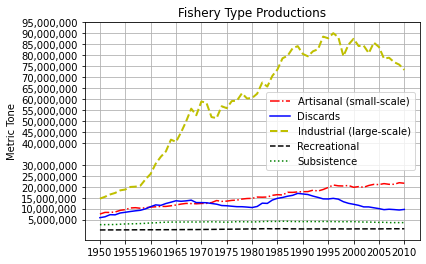

In [15]:
df5 = fishery.rename(columns = {'Artisanal (small-scale commercial)' : 'Artisanal (small-scale)',
                                'Industrial (large-scale commercial)' : 'Industrial (large-scale)'})

mtpl.pyplot.plot('Year', 'Artisanal (small-scale)', data= df5, linestyle = '-.', color = 'r')
mtpl.pyplot.plot('Year', 'Discards', data= df5, linestyle = '-', color = 'b')
mtpl.pyplot.plot('Year', 'Industrial (large-scale)', data= df5, linestyle = '--', color = 'y', linewidth = '2')
mtpl.pyplot.plot('Year', 'Recreational', data= df5, linestyle = '--', color = 'k')
mtpl.pyplot.plot('Year', 'Subsistence', data= df5, linestyle = 'dotted', color = 'g')
mtpl.pyplot.legend()
mtpl.pyplot.title('Fishery Type Productions')
mtpl.pyplot.ylabel('Metric Tone')
mtpl.pyplot.grid(True)
x = [1950, 1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010]
y = [5000000, 10000000,15000000,20000000,25000000,30000000,40000000,45000000,50000000,55000000,60000000,65000000,70000000,75000000,80000000,85000000,90000000,95000000]
mtpl.pyplot.xticks(x,x)
mtpl.pyplot.yticks(y,y)
current_values = mtpl.pyplot.gca().get_yticks()
mtpl.pyplot.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

The graph is showing us here that the industrial (large scale) fisheries, even though are the largest, are slowly declining after 1996 reaching a level of 75 Million metric tones by 2010, but at the same time we see that throughout this 60 year span the Artisanal (small_scale) fisheries are increasing in fish quantity stored/produced. This shows us 2 things, first more people are starting to go fishing either by boat or on the shore which is causing them to consume less industrial produced fish related products. And second, since the demand is decreasing on the industrial fisheries the Discards are also decreasing after 1995, this means that the industries, with the affects of technology as well, are running more efficiently.

## Visualizing the types of fish production over the years

**Fish type Examples & Definition:**
- Pelagic Fish: Fish that inhabit not near the bottom or the shore of coasts, open oceans, and lakes. Examples of species include forage fish such as anchovies, sardines, shad, and menhaden and the predatory fish that feed on them.
- Crustaceans: Crustaceans form a large, diverse arthropod taxon which includes such animals as crabs, lobsters, crayfish, shrimp, krill, prawns, woodlice, barnacles, copepods, amphipods and mantis shrimp.
- Cephalopods: Are members of a class of marine animals that includes octopuses, squid, cuttlefish and nautiluses.
- Demersal Fish: Also known as groundfish, live and feed on or near the bottom of seas or lakes. They occupy the sea floors and lake beds, which usually consist of mud, sand, gravel or rocks.
- Freshwater fish: Are those that spend some or all of their lives in fresh water, such as rivers and lakes, with a salinity of less than 1.05%. These environments differ from marine conditions in many ways, the most obvious being the difference in levels of salinity.
- Molluscs Fish: Most molluscs have a hinged two-part shell and include clams, mussels, oysters, and scallops. ... Fish (e.g., trout, salmon), crustaceans (e.g., lobster, shrimp), and molluscs (e.g., scallops, clams) are sometimes collectively referred to as seafood.
- Marine Fish: Saltwater fish, also called marine fish, are fish that live in ocean water. Saltwater fish can swim and live alone or in a large group called a school. Saltwater fish are very commonly kept in aquariums for entertainment. Many saltwater fish are also caught to be eaten, or grown in aquaculture.

Text(0.5, 1.0, 'Fish Types')

Text(0, 0.5, 'Metric Tone')

([<matplotlib.axis.XTick at 0x121246310>,
 [Text(0, 0, '1960'),
  Text(0, 0, '1965'),
  Text(0, 0, '1970'),
  Text(0, 0, '1975'),
  Text(0, 0, '1980'),
  Text(0, 0, '1985'),
  Text(0, 0, '1990'),
  Text(0, 0, '1995'),
  Text(0, 0, '2000'),
  Text(0, 0, '2005'),
  Text(0, 0, '2010'),
  Text(0, 0, '2013')])

([<matplotlib.axis.YTick at 0x121258d90>,
 [Text(0, 0, '5000000'),
  Text(0, 0, '10000000'),
  Text(0, 0, '15000000'),
  Text(0, 0, '20000000'),
  Text(0, 0, '25000000'),
  Text(0, 0, '30000000'),
  Text(0, 0, '40000000'),
  Text(0, 0, '45000000'),
  Text(0, 0, '50000000'),
  Text(0, 0, '56000000')])

[Text(0, 0, '5,000,000'),
 Text(0, 0, '10,000,000'),
 Text(0, 0, '15,000,000'),
 Text(0, 0, '20,000,000'),
 Text(0, 0, '25,000,000'),
 Text(0, 0, '30,000,000'),
 Text(0, 0, '40,000,000'),
 Text(0, 0, '45,000,000'),
 Text(0, 0, '50,000,000'),
 Text(0, 0, '56,000,000')]

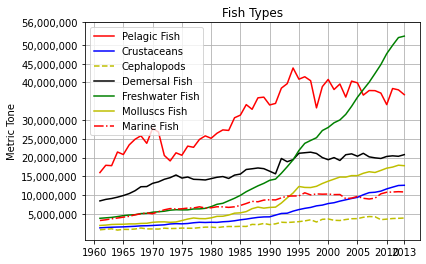

In [16]:
# Removing the Regions and World from Data to avoid double counting
production['Entity'] = production[~production['Entity'].isin(ToExclude)]
#production = production.dropna()

# Renaming column names into proper headers
production = production.rename(columns={
  "Commodity Balances - Livestock and Fish Primary Equivalent - Pelagic Fish - 2763 - Production - 5510 - tonnes" : "Pelagic Fish",
  "Commodity Balances - Livestock and Fish Primary Equivalent - Crustaceans - 2765 - Production - 5510 - tonnes" : "Crustaceans",
  "Commodity Balances - Livestock and Fish Primary Equivalent - Cephalopods - 2766 - Production - 5510 - tonnes" : "Cephalopods",
  "Commodity Balances - Livestock and Fish Primary Equivalent - Demersal Fish - 2762 - Production - 5510 - tonnes" : "Demersal Fish",
  "Commodity Balances - Livestock and Fish Primary Equivalent - Freshwater Fish - 2761 - Production - 5510 - tonnes" : "Freshwater Fish",
  "Commodity Balances - Livestock and Fish Primary Equivalent - Molluscs, Other - 2767 - Production - 5510 - tonnes" : "Molluscs Fish",
  "Commodity Balances - Livestock and Fish Primary Equivalent - Marine Fish, Other - 2764 - Production - 5510 - tonnes" : "Marine Fish"
})

# Visualizing the different types per year
production = production
production['Pelagic Fish'] = production['Pelagic Fish'].fillna(0)
production['Crustaceans'] = production['Crustaceans'].fillna(0)
production['Cephalopods'] = production['Cephalopods'].fillna(0)
production['Demersal Fish'] = production['Demersal Fish'].fillna(0)
production['Freshwater Fish'] = production['Freshwater Fish'].fillna(0)
production['Molluscs Fish'] = production['Molluscs Fish'].fillna(0)
production['Marine Fish'] = production['Marine Fish'].fillna(0)

production_year = production.dropna()

production_year_group = production_year.groupby('Year', as_index=False).sum()

mtpl.pyplot.plot('Year', 'Pelagic Fish', data= production_year_group, linestyle = '-', color = 'r')
mtpl.pyplot.plot('Year', 'Crustaceans', data= production_year_group, linestyle = '-', color = 'b')
mtpl.pyplot.plot('Year', 'Cephalopods', data= production_year_group, linestyle = '--', color = 'y')
mtpl.pyplot.plot('Year', 'Demersal Fish', data= production_year_group, linestyle = '-', color = 'k')
mtpl.pyplot.plot('Year', 'Freshwater Fish', data= production_year_group, linestyle = '-', color = 'g')
mtpl.pyplot.plot('Year', 'Molluscs Fish', data= production_year_group, linestyle = '-', color = 'y')
mtpl.pyplot.plot('Year', 'Marine Fish', data= production_year_group, linestyle = '-.', color = 'r')
mtpl.pyplot.legend()
mtpl.pyplot.title('Fish Types')
mtpl.pyplot.ylabel('Metric Tone')
mtpl.pyplot.grid(True)
x = [1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010,2013]
y = [5000000, 10000000,15000000,20000000,25000000,30000000,40000000,45000000,50000000,56000000]
mtpl.pyplot.xticks(x,x)
mtpl.pyplot.yticks(y,y)
current_values = mtpl.pyplot.gca().get_yticks()
mtpl.pyplot.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])



This graph shows us clearly that Freshwater Fish roduction has become a long way from being at medium production to being the most produced fhish by starting from 2005 and reaching a highest level in 2013 ~56Mn Metric Tones. Behind that follows the Pelagic fish and the Demersal fish which have been on an increase throughut the years, probably because of the increase in the demand (by population), but not at very sharp levels with a max of difference between the highest and the lowest points of ~33Mn Metric tones comparing to the increase by ~51Mn Metric tones of the Freshwater Fish.
This concludes that people are aiming more to produce either natuarally or by aquaculture more Freshwater fish instead of seawater fish and other types.

## Visualizing the types of fish production per country (Top 20)

### General Manipulations

In [17]:
# Getting the list of the top 20 Countries (Entities)
production_year_Top20_Entities = production.groupby('Entity', as_index = False).sum()
production_year_Top20_Entities = production_year_Top20_Entities.drop('Year', axis = 1)
production_year_Top20_Entities['Total'] = production_year_Top20_Entities.iloc[:].sum(axis = 1)
production_year_Top20_Entities = production_year_Top20_Entities.sort_values('Total',ascending=False).head(20)
Top20Countries = production_year_Top20_Entities['Entity'].tolist()

# Pivoting longer to have a all the categories and values under 2 columns
production_year_Top20 = production_year
production_year_Top20 = production_year_Top20.drop('Code', axis = 1)
production_year_Top20 = production_year_Top20.melt(id_vars=['Entity', 'Year'], var_name = 'Fish Type', value_name = "Values (Metric Tones)")

# Filtering the production_year_Top20 table witht the top 20 countries
production_year_Top20['Entity'] = production_year_Top20[production_year_Top20['Entity'].isin(Top20Countries)]
production_year_Top20 = production_year_Top20.dropna()

# Scaling the numbers in millions for the visuals to be neater 
production_year_Top20['Values (Metric Tones)'] = production_year_Top20['Values (Metric Tones)'].div(1000000)

### Visual 1

Text(0.5, 0, 'Metric Tones (Millions)')

([<matplotlib.axis.XTick at 0x121318810>,
 [Text(0, 0, '1960'),
  Text(0, 0, '1965'),
  Text(0, 0, '1970'),
  Text(0, 0, '1975'),
  Text(0, 0, '1980'),
  Text(0, 0, '1985'),
  Text(0, 0, '1990'),
  Text(0, 0, '1995'),
  Text(0, 0, '2000'),
  Text(0, 0, '2005'),
  Text(0, 0, '2010'),
  Text(0, 0, '2013')])

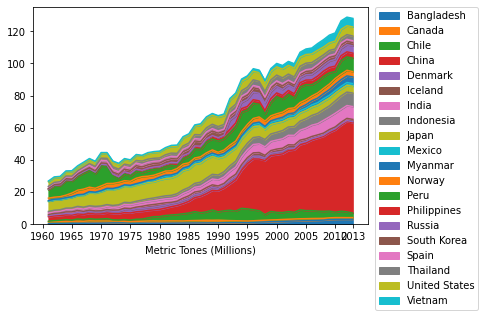

In [18]:
p7 = production_year_Top20.groupby(['Entity', 'Year'], as_index=False).agg({'Values (Metric Tones)':"sum"})
p7 = p7.pivot("Year","Entity","Values (Metric Tones)")
p7.plot.area()
#mtpl.pyplot.yticks(range(len("Entity")),"Values (Metric Tones)")
mtpl.pyplot.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
mtpl.pyplot.xlabel('Metric Tones (Millions)')
x = [1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010,2013]
mtpl.pyplot.xticks(x,x)

### Visual 2

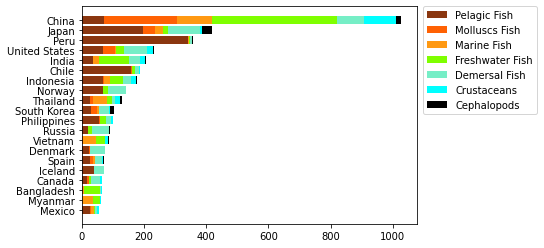

In [19]:
p8 = production_year.drop('Code', axis = 1)
p8['Entity'] = p8[p8['Entity'].isin(Top20Countries)]
p8 = p8.dropna()

for c, t in p8.iteritems():
    if c != 'Entity' and c != 'Year':
        p8[c] = t/1000000
p8 = p8.groupby('Entity', as_index=False).sum()
p8 = p8.drop('Year', axis = 1)
p8['Total'] = p8.iloc[:].sum(axis=1)
p8 = p8.sort_values('Total', ascending = True)
p8 = p8.drop('Total', axis = 1)

w = 0.8
Entity = []
for c,d in p8['Entity'].iteritems():
    Entity.append(d)

p8v2 = mtpl.pyplot.barh(Entity, p8['Pelagic Fish'],w , label ='Pelagic Fish', color= '#8A360F')
p8v3 = mtpl.pyplot.barh(Entity, p8['Molluscs Fish'],w , label ='Molluscs Fish', color='#FF6103', left = p8['Pelagic Fish'])
p8v4 = mtpl.pyplot.barh(Entity, p8['Marine Fish'],w , label ='Marine Fish', color='#FF9912', left = p8['Pelagic Fish'] + p8['Molluscs Fish'])
p8v5 = mtpl.pyplot.barh(Entity, p8['Freshwater Fish'],w , label ='Freshwater Fish', color='#7FFF00', left = p8['Pelagic Fish'] + p8['Molluscs Fish'] + p8['Marine Fish'])
p8v6 = mtpl.pyplot.barh(Entity, p8['Demersal Fish'],w , label ='Demersal Fish', color='#76EEC6', left = p8['Pelagic Fish'] + p8['Molluscs Fish'] + p8['Marine Fish'] + p8['Freshwater Fish'])
p8v7 = mtpl.pyplot.barh(Entity, p8['Crustaceans'],w , label ='Crustaceans', color='#00FFFF', left = p8['Pelagic Fish'] + p8['Molluscs Fish'] + p8['Marine Fish'] + p8['Freshwater Fish'] + p8['Demersal Fish'])
p8v8 = mtpl.pyplot.barh(Entity, p8['Cephalopods'],w , label ='Cephalopods', color='black', left = p8['Pelagic Fish'] + p8['Molluscs Fish'] + p8['Marine Fish'] + p8['Freshwater Fish'] + p8['Demersal Fish'] + p8['Crustaceans'])
mtpl.pyplot.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


### Visual 3

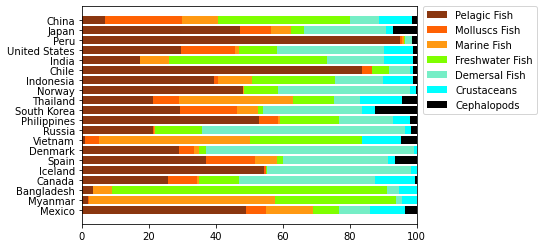

In [20]:
p9 = copy.deepcopy(p8)

fish_type = ['Pelagic Fish','Molluscs Fish', 'Marine Fish', 'Freshwater Fish', 'Demersal Fish', 'Crustaceans', 'Cephalopods']

p9.loc[:,'Pelagic Fish':'Marine Fish'] = (p9.loc[:,'Pelagic Fish':'Marine Fish'].div(p9.sum(axis=1),axis=0))*100

p9v2 = mtpl.pyplot.barh(Entity, p9['Pelagic Fish'],w , label ='Pelagic Fish', color= '#8A360F')
p9v3 = mtpl.pyplot.barh(Entity, p9['Molluscs Fish'],w , label ='Molluscs Fish', color='#FF6103', left = p9['Pelagic Fish'])
p9v4 = mtpl.pyplot.barh(Entity, p9['Marine Fish'],w , label ='Marine Fish', color='#FF9912', left = p9['Pelagic Fish'] + p9['Molluscs Fish'])
p9v5 = mtpl.pyplot.barh(Entity, p9['Freshwater Fish'],w , label ='Freshwater Fish', color='#7FFF00', left = p9['Pelagic Fish'] + p9['Molluscs Fish'] + p9['Marine Fish'])
p9v6 = mtpl.pyplot.barh(Entity, p9['Demersal Fish'],w , label ='Demersal Fish', color='#76EEC6', left = p9['Pelagic Fish'] + p9['Molluscs Fish'] + p9['Marine Fish'] + p9['Freshwater Fish'])
p9v7 = mtpl.pyplot.barh(Entity, p9['Crustaceans'],w , label ='Crustaceans', color='#00FFFF', left = p9['Pelagic Fish'] + p9['Molluscs Fish'] + p9['Marine Fish'] + p9['Freshwater Fish'] + p9['Demersal Fish'])
p9v8 = mtpl.pyplot.barh(Entity, p9['Cephalopods'],w , label ='Cephalopods', color='black', left = p9['Pelagic Fish'] + p9['Molluscs Fish'] + p9['Marine Fish'] + p9['Freshwater Fish'] + p9['Demersal Fish'] + p9['Crustaceans'])
mtpl.pyplot.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

#gs = mtpl.gridspec(nrows=2, ncols=2)

# THE ONLY THING REMAINING TO DO HERE IS TO PUT ALL 3 VISUALIZATIONS INTO GRID

The obvious country that is leading the seafood market in production is China with more than 1 Billion metric tones of seafood from 1960 till 2013 that is around 18.8 Million tones per year on average with the most increase happening staring from the 1990s. The leading type of fish for China's production is freshwater fish which again they lead in worldwide. It's also worth mentioning that Peru is the leader of Pelagic fish production worldwide producing more than 350 Million Tones in the past ~50 years.